In [1]:
# Import tensorflow y lo necesario para hacer nuestra CNN

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,initializers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importamos google drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importamos datos de los directporios utilizando imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator


In [4]:
# cargamos los directorios
traindata = ImageDataGenerator()
train_images = traindata.flow_from_directory(
    directory='/content/drive/MyDrive/TF/glasses-noglasses/train',
    target_size=(160,160),
    class_mode='categorical'
)
testdata = ImageDataGenerator()
test_images = testdata.flow_from_directory(
    directory='/content/drive/MyDrive/TF/glasses-noglasses/validate',
    target_size=(160,160),
    class_mode='categorical'
)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


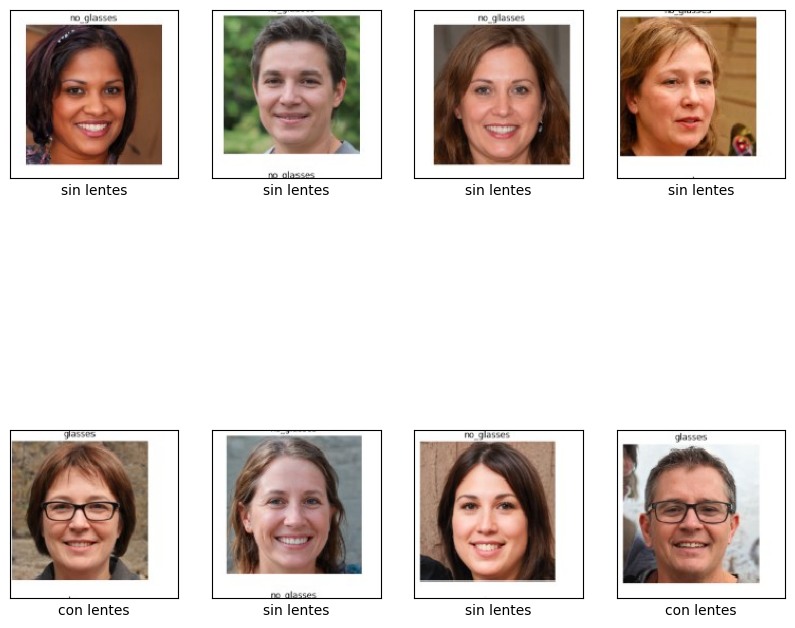

In [5]:
# Definimos las clases
class_names = ['con lentes', 'sin lentes']
plt.figure(figsize=(10,10))

# Obtener un lote de imágenes y etiquetas
images, labels = next(train_images)

for i in range(8):  # Asumiendo que quieres visualizar 8 imágenes
    plt.subplot(2, 4, i + 1)  # Ajusta el subplot para 8 imágenes
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype('uint8'))  # Conversión para visualización correcta
    plt.xlabel(class_names[np.argmax(labels[i])])  # Asumiendo que las etiquetas están en formato categórico

plt.show()


In [6]:
# importamos librerias
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [7]:
# Preparamos el modelo de la red neuronal convolucional (CNN)

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

In [8]:
# vemos el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [9]:
# agregamos capas dense y flatten
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))



In [10]:
# vemos el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 82944)             0

In [11]:
#compilamos y entrenamos el modelo

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



history = model.fit(train_images , epochs=10, validation_data=(test_images))

Epoch 1/10
4/4 [==============================] - 29s 6s/step - loss: 170.5923 - accuracy: 0.5096 - val_loss: 52.6654 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 5s 2s/step - loss: 27.6168 - accuracy: 0.5000 - val_loss: 14.7223 - val_accuracy: 0.5250
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 5.9321 - accuracy: 0.5962 - val_loss: 5.6581 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 5s 2s/step - loss: 0.6438 - accuracy: 0.8654 - val_loss: 1.5857 - val_accuracy: 0.6000
Epoch 5/10
4/4 [==============================] - 6s 2s/step - loss: 0.3041 - accuracy: 0.9231 - val_loss: 2.1161 - val_accuracy: 0.5750
Epoch 6/10
4/4 [==============================] - 5s 2s/step - loss: 0.2142 - accuracy: 0.9519 - val_loss: 1.6239 - val_accuracy: 0.5250
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.1804 - accuracy: 0.9615 - val_loss: 1.4018 - val_accuracy: 0.5750
Epoch 8/10
4/4 [===================

In [12]:
#print(len(history.history['accuracy']))

#print(len(history.history['acc']))
print(history.history['accuracy'])

print(history.history['val_accuracy'])

[0.5096153616905212, 0.5, 0.5961538553237915, 0.8653846383094788, 0.9230769276618958, 0.9519230723381042, 0.9615384340286255, 0.932692289352417, 0.9519230723381042, 0.9711538553237915]
[0.5, 0.5249999761581421, 0.5, 0.6000000238418579, 0.574999988079071, 0.5249999761581421, 0.574999988079071, 0.6499999761581421, 0.6000000238418579, 0.574999988079071]


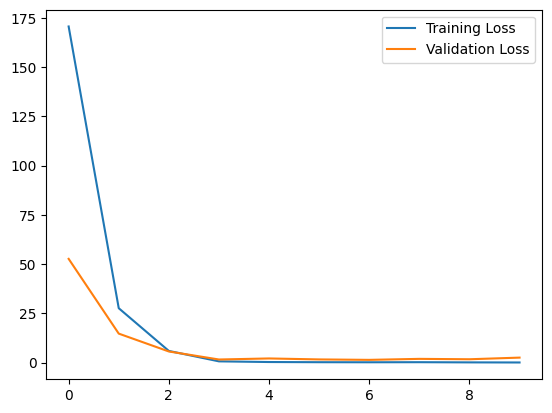

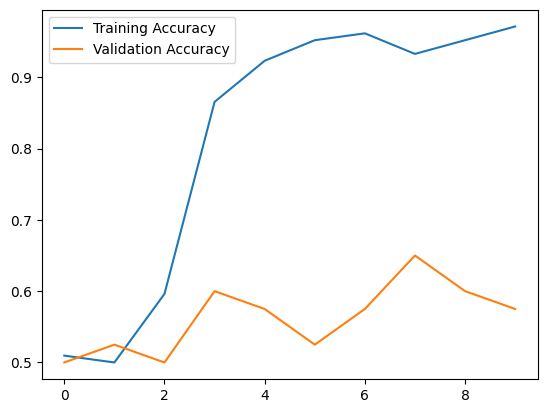

In [13]:
# Visualización de curvas de pérdida y precisión
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

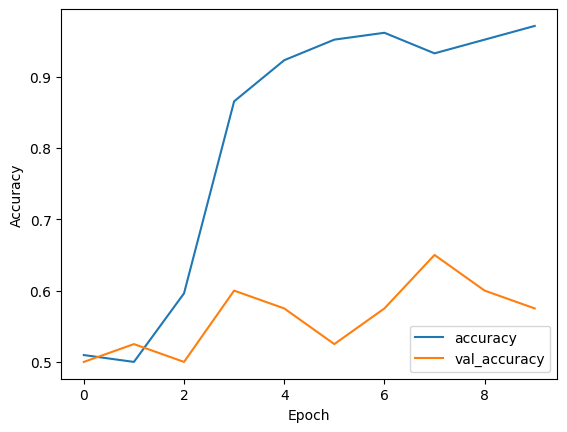

In [14]:
#Evaluamos el modelo y visualizamos la precisión a lo largo de las épocas

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
#guardamos el modelo
model.save("pruebas")

1/1 [==============================] - 0s 114ms/step
no-glasses


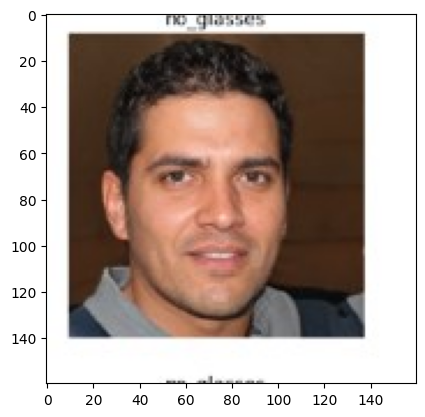

In [18]:
#Cargamos una imagen de prueba y la mostramos
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/TF/glasses-noglasses/test/row-7-column-5.jpg",target_size=(160,160))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model

# Cargamos el modelo guardado
saved_model = load_model("pruebas")

# Realizamos la predicción sobre la imagen de prueba
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glasses")
else:
    print('no-glasses')